<img src="gu.png" height = "80" width = "80">

<h1 align = "center">Department Of Computer Science</h1>
<h2 align = "center">Gujarat University, Ahmedabad</h2>

<hr>

Subject : Natural Language Processing<br>
Class : M.sc(AI & ML) Sem-3


## Sentiment Analysis on Coffee Shop Reviews "


 Vatsal Gamit (09) <br>


<hr>

In [51]:
import numpy as np 
import pandas as pd 
import math
import string,re
import nltk
#nltk.download('all')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Read the data

In [2]:
df = pd.read_csv('coffee.csv')
df.head(10)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...
5,A35NA371SV1PAH,3,Not enough coffee flavor and definitely to swe...
6,A1LR5HPNQLH4RI,1,don't bother! bet you couldn't tell the differ...
7,A2RCZ8YKLE8B3O,1,"Never tasted this coffee before, I felt much t..."
8,A31D6GWYLIKF4X,2,While the overall idea behind the product is l...
9,A1KZPDB5MOWNVU,5,I bought a keurig and bought these to try. Wel...


In [3]:
df.shape

(542, 3)

In [4]:
df.columns

Index(['user_id', 'stars', 'reviews'], dtype='object')

In [5]:
#Remove unnecessary colomns
df.drop(columns=['user_id'],inplace=True)

## Preprocessing

In [6]:
def clean_text(text,pattern):
    
    r = re.findall(pattern,text)

    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [7]:
df['reviews'] = np.vectorize(clean_text)(df['reviews'], "@[\w]*")

df.head()

,stars,reviews
0,1,I wanted to love this. I was even prepared for...
1,5,Grove Square Cappuccino Cups were excellent. T...
2,2,I bought the Grove Square hazelnut cappuccino ...
3,1,"I love my Keurig, and I love most of the Keuri..."
4,1,It's a powdered drink. No filter in k-cup.<br ...


In [8]:
def Convert(x):
    if x>4:
        return 'Positive'
    return 'Negative'

In [1]:
df['Sentiment'] = df['stars'].apply(Convert)

NameError: name 'df' is not defined

In [10]:
#Now we have Sentiment so we can drop our star colomn
df.drop(columns=['stars'],inplace=True)
df.head()

,reviews,Sentiment
0,I wanted to love this. I was even prepared for...,Negative
1,Grove Square Cappuccino Cups were excellent. T...,Positive
2,I bought the Grove Square hazelnut cappuccino ...,Negative
3,"I love my Keurig, and I love most of the Keuri...",Negative
4,It's a powdered drink. No filter in k-cup.<br ...,Negative


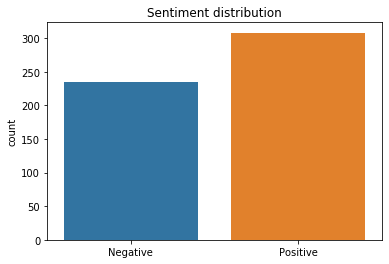

In [11]:
f = sns.countplot(x='Sentiment', data=df)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

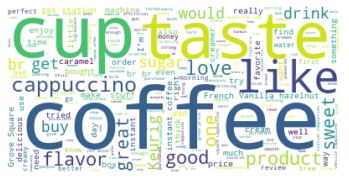

In [12]:
text = " ".join(review for review in df.reviews)


wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## TFIDF & CountVectorizer

In [20]:
tfidf = TfidfVectorizer(max_df=0.90, min_df=2,
                        max_features=2500,stop_words='english')

tfidf = tfidf.fit_transform(df['reviews'])

tfidf_df = pd.DataFrame(tfidf.todense())

tfidf_df.shape

(542, 1005)

In [17]:
vectorizer = CountVectorizer(max_df=0.90, min_df=2, 
                             max_features=2500, stop_words = 'english')

vector = vectorizer.fit_transform(df['reviews'])

vector_df = pd.DataFrame(vector.todense())

vector_df.shape

(542, 1005)

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(vector,df['Sentiment'],test_size=0.3, random_state=38)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((379, 1005), (379,), (163, 1005), (163,))

In [40]:
x_train,x_test,y_train,y_test = train_test_split(tfidf,df['Sentiment'],test_size=0.3, random_state=38)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((379, 1005), (379,), (163, 1005), (163,))

## SVC

In [48]:
clf_2 = SVC(kernel = 'linear')

clf_2.fit(X_train, Y_train)
clf_2.fit(x_train, y_train)

svm_pred_vector = clf_2.predict(X_test)
svm_pred_tfidf = clf_2.predict(x_test)

print("########### Scores for CountVectorizer ###########","\n")
print("_______________________________________________________")
print(confusion_matrix(Y_test,svm_pred_vector))
print(classification_report(Y_test,svm_pred_vector))
print(accuracy_score(Y_test, svm_pred_vector))
print("_______________________________________________________")

########### Scores for CountVectorizer ########### 

_______________________________________________________
[[53 12]
 [ 6 92]]
              precision    recall  f1-score   support

    Negative       0.90      0.82      0.85        65
    Positive       0.88      0.94      0.91        98

    accuracy                           0.89       163
   macro avg       0.89      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163

0.8895705521472392
_______________________________________________________


## Logistic Regression Classifer

In [47]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

Log_Reg.fit(X_train,Y_train)
Log_Reg.fit(x_train,y_train)

log_predict_vector = Log_Reg.predict(X_test)
log_predict_tfidf = Log_Reg.predict(x_test)


print("########### Scores for CountVectorizer ###########","\n")
print("_______________________________________________________")
print(confusion_matrix(Y_test,log_predict_vector))
print(classification_report(Y_test,log_predict_vector))
print(accuracy_score(Y_test, log_predict_vector))
print("_______________________________________________________")

########### Scores for CountVectorizer ########### 

_______________________________________________________
[[54 11]
 [13 85]]
              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82        65
    Positive       0.89      0.87      0.88        98

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163

0.852760736196319
_______________________________________________________


<h1> Thank You </h1>